# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

import copy

In [2]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [3]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


weights:  [2.90021144]


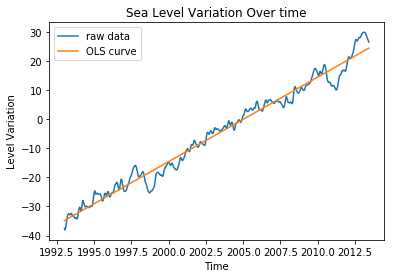

In [4]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #
X_train = sea_level_df["time"].values.reshape(-1,1)
y_train = sea_level_df["level_variation"].values
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
coeffs = ols_model.coef_
print("weights: ", coeffs)

# Plot training data along with the regression curve
plt.plot(X_train, y_train, label="raw data")
plt.plot(X_train, ols_model.predict(X_train), label="OLS curve")
plt.title("Sea Level Variation Over time")
plt.xlabel("Time")
plt.ylabel("Level Variation")
plt.legend()
plt.show()

MSE:  90.73366367292064


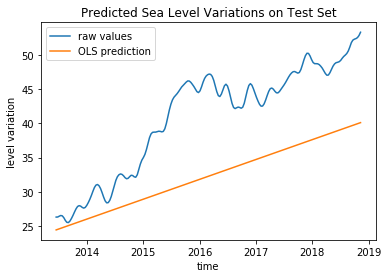

In [5]:
# Part b - Prediction of testing points #

# Predict using OLS model
X_test = sea_level_df_test["time"].values.reshape(-1,1)
y_test = sea_level_df_test["level_variation"].values
y_hat = ols_model.predict(X_test)

# Calculate mean squared error between ground truth and predictions
mse = mean_squared_error(y_test, y_hat)
print("MSE: ", mse)

# plot for visualization
plt.plot(X_test, y_test, label="raw values")
plt.plot(X_test, y_hat, label="OLS prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("level variation")
plt.title("Predicted Sea Level Variations on Test Set")
plt.show()


=== Window Size:  5  ===

weights:  [2.90025083]


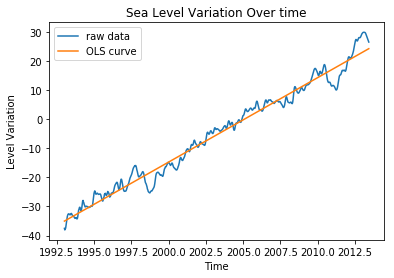

MSE:  93.70454479670705

=== Window Size:  7  ===

weights:  [2.89977081]


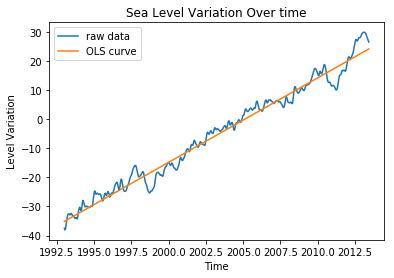

MSE:  95.34716050137376

=== Window Size:  15  ===

weights:  [2.89369057]


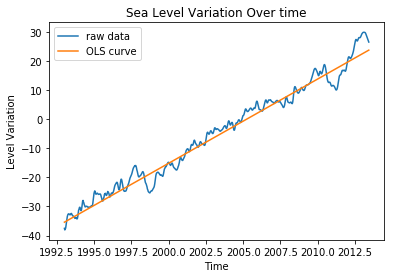

MSE:  103.13349512987666


In [6]:
# Part c - data transformations #
# ROLLING MEAN
window_sizes = [5,7,15]

for win_val in window_sizes:
    print("\n=== Window Size: ", win_val, " ===\n")
    df_rolling = sea_level_df.rolling(window=win_val, min_periods=1).mean()


    # Repeat parts a and b for rolling mean
    y_roll = df_rolling["level_variation"].values

    ols_model = LinearRegression()
    ols_model.fit(X_train, y_roll)
    coeffs = ols_model.coef_
    print("weights: ", coeffs)

    fitted_roll = ols_model.predict(X_train)

    # Plot training data along with the regression curve
    plt.plot(X_train, y_train, label="raw data")
    plt.plot(X_train, fitted_roll, label="OLS curve")
    plt.title("Sea Level Variation Over time")
    plt.xlabel("Time")
    plt.ylabel("Level Variation")
    plt.legend()
    plt.show()


    # Part b - Prediction of testing points #

    # Predict using OLS model
    X_test = sea_level_df_test["time"].values.reshape(-1,1)
    df_test_rolling = sea_level_df_test.rolling(window=win_val, min_periods=1).mean()
    y_test_roll = sea_level_df_test["level_variation"].values
    y_hat = ols_model.predict(X_test)

    # Calculate mean squared error between ground truth and predictions
    mse = mean_squared_error(y_test, y_hat)
    print("MSE: ", mse)


weights:  [-0.00021296]


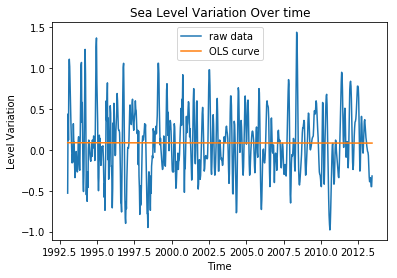

MSE:  0.0030565279373226907


In [7]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING

def calc_diff(vals):
    return [vals[i]-vals[i-1] for i in range(1,len(vals))]
 
X_diff = X_train[1:]
y_diff = calc_diff(y_train)

# Repeat parts a and b for first order differencing

ols_model = LinearRegression()
ols_model.fit(X_diff, y_diff)
coeffs = ols_model.coef_
print("weights: ", coeffs)

fitted_diff = ols_model.predict(X_diff)

# Plot training data along with the regression curve
plt.plot(X_diff, y_diff, label="raw data")
plt.plot(X_diff, fitted_diff, label="OLS curve")
plt.title("Sea Level Variation Over time")
plt.xlabel("Time")
plt.ylabel("Level Variation")
plt.legend()
plt.show()


# Part b - Prediction of testing points 

# Predict using OLS model
X_test = sea_level_df_test["time"].values.reshape(-1,1)
y_test = sea_level_df_test["level_variation"].values

y_test_diff = calc_diff(X_test)
X_test_diff = X_test[1:]

y_hat = ols_model.predict(X_test_diff)

# Calculate mean squared error between ground truth and predictions
mse = mean_squared_error(y_test_diff, y_hat)
print("MSE: ", mse)

In [8]:
# Part c - data transformations #

# get train dataset
X_train = sea_level_df['time'].values.reshape(-1, 1)
y_train = sea_level_df['level_variation'].values.reshape(-1, 1)

In [9]:
# Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

# get transform parameteres
yj_transformer = PowerTransformer()
yj_transformer.fit(y_train)
y_train_trans = yj_transformer.transform(y_train)

In [10]:
# # log transform - cant apply because of negative values
# X_train_trans = np.log(X_train)
# y_train_trans = np.log(y_train)

# # expanding mean transform
# y_train_trans = pd.DataFrame(y_train).expanding().mean()

# n = y_train_trans.shape[0]
# foo = (n + np.arange(1, n+1)).reshape(-1, 1)
# bar = (n + np.arange(n)).reshape(-1, 1)

# y_orig = (y_train_trans.values * foo) - (y_train_trans.shift(-1).fillna(0).values * bar)

# print(np.hstack((y_train, y_orig)))

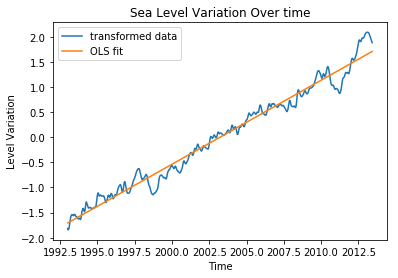

MSE using OLS fit on yeo johnson transformed data = 115.75264903601062


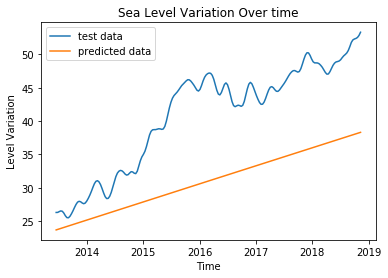

In [11]:
# fit ols on the transformed time series values
ols_yj = LinearRegression()
ols_yj.fit(X_train, y_train_trans)

# visualize the fit
plt.plot(X_train, y_train_trans, label='transformed data')
plt.plot(X_train, ols_yj.predict(X_train), label='OLS fit')
plt.title("Sea Level Variation Over time")
plt.xlabel("Time")
plt.ylabel("Level Variation")
plt.legend()
plt.show()

# get test dataset
X_test = sea_level_df_test['time'].values.reshape(-1, 1)
y_test = sea_level_df_test['level_variation'].values.reshape(-1, 1)

# predict values for test dataset and get mse
y_hat = ols_yj.predict(X_test)
mse = mean_squared_error(y_test, yj_transformer.inverse_transform(y_hat))
print('MSE using OLS fit on yeo johnson transformed data = {}'.format(mse))

# plot the test data and corresponding predictions
plt.plot(X_test, y_test, label='test data')
plt.plot(X_test, yj_transformer.inverse_transform(y_hat), label='predicted data')
plt.title("Sea Level Variation Over time")
plt.xlabel("Time")
plt.ylabel("Level Variation")
plt.legend()
plt.show()

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

**See attached PDF in this folder.**

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [12]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set
k_vec = list(range(1, 11)) # in Python, vectors do not include max value
accuracy_vec = []

best_acc = 0
best_k = 0
for i in range(len(k_vec)):
    knn = KNeighborsClassifier(n_neighbors=k_vec[i])
    knn.fit(X_iris_train,y_iris_train)
    yi_pred = knn.predict(X_iris_test)
    curr_accuracy = metrics.accuracy_score(y_iris_test,yi_pred)
    if curr_accuracy > best_acc:
        best_acc = curr_accuracy
        best_k = k_vec[i]

# Construct a decision tree on the training data.
# Test decision tree with testing set
clfi = tree.DecisionTreeClassifier()
clfi.fit(X_iris_train,y_iris_train)
clfpredi = clfi.predict(X_iris_test)

# Compare accuracies between the two algorithms (print them out)
print("KNN best accuracy (from testing k=1 to 10):", best_acc, "with best k =", best_k)
print("Decision tree accuracy:", metrics.accuracy_score(y_iris_test,clfpredi))

KNN best accuracy (from testing k=1 to 10): 1.0 with best k = 8
Decision tree accuracy: 0.9777777777777777


In [15]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set
accuracy_vec = []

best_k = 0
best_acc= 0
for i in range(len(k_vec)):
    knnw = KNeighborsClassifier(n_neighbors=k_vec[i])
    knnw.fit(X_wine_train,y_wine_train)
    yw_pred = knnw.predict(X_wine_test)
    curr_accuracy = metrics.accuracy_score(y_wine_test,yw_pred)
    if curr_accuracy > best_acc:
        best_acc = curr_accuracy
        best_k = k_vec[i]

# Construct a decision tree on the training data
# Test decision tree with testing set
clfw = tree.DecisionTreeClassifier()
clfw.fit(X_wine_train,y_wine_train)
clfpredw = clfw.predict(X_wine_test)

# Compare accuracies between the two algorithms (print them out)
print("KNN best accuracy (from testing k=1 to 10):", best_acc, "with best k =", best_k)
print("Decision tree accuracy:", metrics.accuracy_score(y_wine_test, clfpredw))

KNN best accuracy (from testing k=1 to 10): 0.7407407407407407 with best k = 1
Decision tree accuracy: 0.9629629629629629


**KNN seems to perform worse on the wine dataset. KNN performs better when the data is normalized, meaning the features have approximately the same scale. In the case that it is not normalized, the feature dimensions that have smaller values may become uninformative, and the algorithm would essentially rely on the single dimension whose values are substantially larger (due to the distance metric). In this case, the wine dataset has one particular feature (Proline) that is ~1000x larger than all the other features. This is the probable reason KNN performs poorly on this dataset as opposed to the Iris dataset - its distance metric does not accurately represent how different certain samples are, since it is relying largely on the Proline feature.**

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

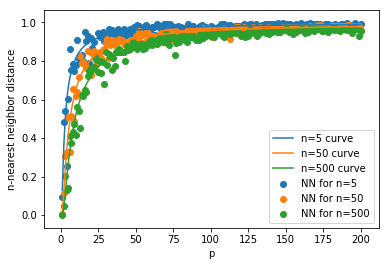

In [16]:
# Plot n p-dimensional uniformly-distributed data points
from numpy import inf # not sure why I had to do this but I got an undefined error otherwise
n1 = 5
n2 = 50
n3 = 500
n1_vec = list(range(1, n1+1))
n2_vec = list(range(1, n2+1))
n3_vec = list(range(1, n3+1))

p = 200
p_vec = list(range(1, p+1))
min5_distance = []
min50_distance = []
min500_distance = []

minfinaldist5 = []
minfinaldist50 = []
minfinaldist500 = []

# Double for loop to generate n1 samples with p dimensions
for i in range(len(p_vec)):
    for j in range(len(n1_vec)):
        sample5 = np.random.uniform(-1,1,p_vec[i])
        min5_distance.append(np.linalg.norm(sample5, inf))
    # Compute nearest neighbors to the origin in terms of maximum norm
    minfinaldist5.append(np.min(min5_distance))
    min5_distance = []

# Double for loop to generate n2 samples with p dimensions
for i in range(len(p_vec)):
    for j in range(len(n2_vec)):
        sample50 = np.random.uniform(-1,1,p_vec[i])
        min50_distance.append(np.linalg.norm(sample50, inf))
    # Compute nearest neighbors to the origin in terms of maximum norm
    minfinaldist50.append(np.min(min50_distance))
    min50_distance = []
    
# Double for loop to generate n3 samples with p dimensions
for i in range(len(p_vec)):
    for j in range(len(n3_vec)):
        sample500 = np.random.uniform(-1,1,p_vec[i])
        min500_distance.append(np.linalg.norm(sample500, inf))
    # Compute nearest neighbors to the origin in terms of maximum norm
    minfinaldist500.append(np.min(min500_distance))
    min500_distance = []

# Median distance expression for each n
yval5 = pow((1 - pow(.5, (1/n1))), (np.divide(1, p_vec)));
yval50 = pow((1 - pow(.5, (1/n2))), (np.divide(1, p_vec)));
yval500 = pow((1 - pow(.5, (1/n3))), (np.divide(1, p_vec)));

# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.
plt.scatter(p_vec, minfinaldist5, label='NN for n=5')
plt.scatter(p_vec, minfinaldist50, label='NN for n=50')
plt.scatter(p_vec, minfinaldist500, label='NN for n=500')
plt.plot(p_vec, yval5, label="n=5 curve")
plt.plot(p_vec, yval50, label="n=50 curve")
plt.plot(p_vec, yval500, label="n=500 curve")
plt.xlabel("p")
plt.ylabel("n-nearest neighbor distance")
plt.legend()
plt.show()

**Plot using MATLAB:**

![title](hw3_problem4a.jpg)